# Data Wrangling in STATA

## Introduction and Overview

One of the most powerful and attractive features of STATA is how easy it is to construct and clean data. By the end of the notebook you will earn how to append datasets, merge datasets, reshape datasets and collapse datasets. 

### Appending data

Appending data is a simple way combine observations from two different datasets. In many datasets you will come across in the wild, the data are often stored in multiple files. For example, a file for each year or a file for each state, but when we go to data analysis, it will generally be convenient to have all the data together in the same file. For example, in the simple example given below, we have two datasets, each from a separate school. We can construct a new dataset that combines the school-specific datasets by using the ``append`` command in STATA.

<img src="img/append.png" width="800">

<!---To append two datasets you need to be careful about being consistent with variable names across datasets. For example, if dataset 1 had named the GPA variable ``GPA`` and dataset 2 had named it ``grade_point_average``, then both variables will appear in the appended dataset, but GPA will be missing for ever student in dataset 2.--> 

### Merging data

A similar, but slightly different scenario is when we want to ``merge`` two datasets. We do this when we have two datasets that have a common unit of observation, but potentially different variables. For example, in the simple example below, dataset 1 is a datset of students and their assigned school, while dataset 2 is a dataset of students and their grades. The goal of the ``merge`` command is to create a single dataset with student identifiers, school identifiers, and student grades:

<img src="img/merge_one.png" width="800">

### Reshaping Data

Often we have multiple observations for the same unit (for example, a GPA for a student each term). It is sometimes convenient to reshape the data so that we have a single observation per student. When we have multiple observations per unit, then our data is in ``long`` forma. If we have a single observation per unit, then we are in ``wide`` format. In STATA we can freely convert between the two:

<img src="img/reshape.png" width="800">

The syntax for reshaping can sometimes be hard to remember so don't forget to reference the ``help`` file if you find yourself forgetting how to reshape the data. 

## Application -- Opioid Prescriptions in the United States

Beginning in the 1990s up until today, opioid usage has been skyrocketing in the United States. In this application we are going to look at opioid usage across U.S. counties. We will be particularly interested in understanding what factors, such as labor-market conditions, may be associated with opioid usage.

The first dataset we will look at is named ``opioid_2006.dta`` and comes from the CDC [source](https://www.cdc.gov/drugoverdose/maps/rxrate-maps.html). The data reports the prescription rate for a large portion of U.S. counties. The prescription rate will be defined as the number of prescriptions (per year) per 100 people. So a prescription rate of 50 implies that in that year, there were 50 opioid prescriptions per 100 people. Because a single person can have multiple prescriptions per year, this rate is not equal to the fraction of people using opioids per year. That will be even clearer once we load the data.

In [1]:
use /Users/davidarnold/Dropbox/Teaching/ECON5/Datasets/opioids_2006.dta, replace

describe




Contains data from /Users/davidarnold/Dropbox/Teaching/ECON5/Datasets/opioids_20
> 06.dta
  obs:         2,733                          
 vars:             4                          19 Aug 2020 14:20
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
county          str25   %25s                  County
state           str5    %9s                   State
fips_county     str16   %16s                  Numeric FIPS code for County
prescrip_rate   double  %10.0g                Prescriptions per 100 persons
--------------------------------------------------------------------------------
Sorted by: fips_county


As mentioned above our key variable of interest will be ``prescription_rate`` which gives the 

In [2]:
%head

,county,state,fips_county,prescrip_rate
1,Autauga,AL,01001,134.8
2,Baldwin,AL,01003,127.8
3,Barbour,AL,01005,78.09999999999999
4,Bibb,AL,01007,114.3
5,Blount,AL,01009,40.3
6,Bullock,AL,01011,34.6
7,Butler,AL,01013,105.4
8,Calhoun,AL,01015,165.7
9,Chambers,AL,01017,120.4
10,Cherokee,AL,01019,123.8


So looking at the data some of these numbers are already quite suprising. A ``prescip_rate`` over 100 implies that for every person in the county, there was at least one opioid prescription (this does not imply everyone is using opioids, many people are prescribed more than one prescription per year).

Now this is only data for 2006, but we want to see how prescription rates have evolved over time. Let's look at a decade later, in 2016. To keep track of the year we need to create a new variable:

In [3]:
gen year = 2006

Now we can ``append`` the 2016 dataset so that we have all the data together.

In [4]:
append using /Users/davidarnold/Dropbox/Teaching/ECON5/Datasets/opioids_2016.dta

Now the dataset should include both the 2006 prescription rates as well as the 2016 prescription rates. To make sure we have everything here, let's count the number of observations

In [5]:
count

  5,466


Which is double the number we had before. One thing we need to do now before continuing is to fill in the variable ``year`` for the 2016 data. First, we can see that it is missing by typing

In [6]:
tab year 


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2006 |      2,733      100.00      100.00
------------+-----------------------------------
      Total |      2,733      100.00


This reveals that year is only included for the 2006 observations, but missing for the 2,733 2016 observations. So let's fill in that variable 

In [7]:
replace year = 2016 if year==.

(2,733 real changes made)


And let's check just to make sure that the command worked how we think it should.

In [8]:
tab year


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2006 |      2,733       50.00       50.00
       2016 |      2,733       50.00      100.00
------------+-----------------------------------
      Total |      5,466      100.00


Ok so now we can start exploring prescription rates for opioid usage. Let's first look at the mean prescription rate in both years.

In [9]:
tabulate year, summarize(prescrip_rate)


            |  Summary of Prescriptions per 100
            |               persons
       year |        Mean   Std. Dev.       Freq.
------------+------------------------------------
       2006 |   80.658946   43.230614       2,733
       2016 |   80.098683   40.224893       2,733
------------+------------------------------------
      Total |   80.378814   41.751928       5,466


So, on average, opioid prescription rates are relatively similar between 2006 to 2016. This finding suprised me initially, given the media coverage of the opioid epidemic has only been relatively recent, and so I had assumed that prescription rates had been steadily increasing throughout the 2000s. After reading into this a little more, though, I discovered, that although prescriptions rates have been declining since 2012, illicit usage of close substitutes of prescription opioids, such as heroin, has been on the rise and fueling the opioid epidemic. So while legal prescriptions have been declining in recent years, overdoses due to illicit opioids has been on the rise.  

Next, we want to understand variation across places, and what factors may be associated with high prescription rates. To simplify things for now, I am going to now restrict once again to the 2006 data.

In [10]:
keep if year==2006

(2,733 observations deleted)


Let's look at a histogram of the prescription rates across counties:

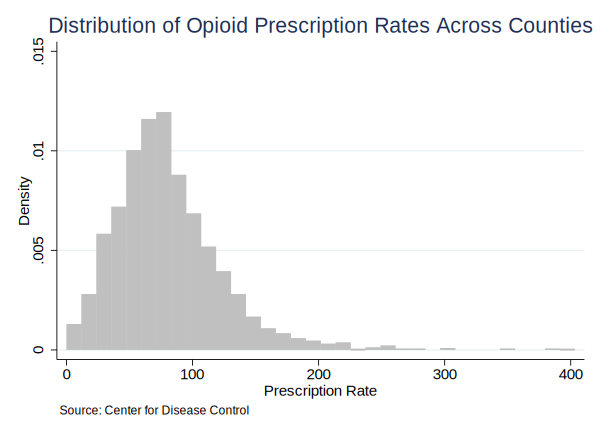

In [11]:
graph twoway histogram prescrip_rate, color(gs12) ///
    title("Distribution of Opioid Prescription Rates Across Counties") ///
    xtitle("Prescription Rate") ///
    ytitle("Density") ///
    note("Source: Center for Disease Control") ///
    legend(off) ///
    graphregion(color(white) fcolor(white)) 

To me, this looks like incredible variation across location. Some counties have basically zero prescriptions per person, while others have over 2 prescriptions per person. Understanding what drives this variation across locations is an incredibly important question. If we want to develop policies aimed at preventing opioid overdoses, we need to understand what is fueling the epidemic.

One hypothesis is that poor labor-market conditions are contributing to the epidemic. The logic being that workers who are laid off are more likely to abuse opioids. The causality could also work in the opposite direction. Individuals who are addicted to opioids may have a harder time finding a job, leading to higher unemployment. Providing a clear causal relationship from unemployment to opioid usage (or vice-versa) is a difficult and nuanced problem. In this application, however, we are going to look at whether there appears to be a correlation between the two, while being careful to not over-interpret any relationship we find.

However, to do this, we need data on unemployment rates. These data will come from the Bureau of Labor Statistics and will be named ``urate_2006.dta``. Now you can see the power of linking datasets. Very few datasets have both health and labor-market outcomes, but by combining datasets we can study a new questions. Let's look at ``urate_2006.dta`` so that we can try to understand how we can merge it to ``opioids_2006.dta``

In [12]:
use /Users/davidarnold/Dropbox/Teaching/ECON5/Datasets/urate_2006.dta, replace
d




Contains data from /Users/davidarnold/Dropbox/Teaching/ECON5/Datasets/urate_2006
> .dta
  obs:         2,733                          
 vars:             4                          19 Aug 2020 14:20
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
county          str47   %47s                  County
labor_force     str14   %14s                  Total number of Workers in the
                                                Labor Force
urate           double  %10.0g                Unemployment Rate
fips_county     str16   %16s                  Numeric FIPS code for County
--------------------------------------------------------------------------------
Sorted by: fips_county


If you recall, we had a variable called ``fips_county`` in the opioid dataset as well. We will be merging the dataset on this variable. You need to make sure in general that the variable you are matching on is standardized across datasets. For these datasets, I found that the FIPS variables were stored in slightly different ways across datasets. For example, the FIPS code for the first county "Autauga County" was stored as "01001" in one of the datasets but "1001" where the difference is the leading zero. So I had to add the zero to the latter variable so that the codes would match properly. If you don't make sure the merge variable is correct your analysis will be completely thrown off.

So now let's merge these two datsets using the ``merge`` command:

In [13]:
merge 1:1 fips_county using /Users/davidarnold/Dropbox/Teaching/ECON5/Datasets/urate_2016.dta


    Result                           # of obs.
    -----------------------------------------
    not matched                             0
    matched                             2,733  (_merge==3)
    -----------------------------------------


The merge command will always display a table like this as well as generate a variable called ``_merge`` (unless you use an option not to report or generate this variabl). In this example, I already made sure that the counties perfectly match between the opioids and the unemployment datasets. Therefore we got ``_merge==3`` for all the counties, because all the counties matched. Just to show you what happens, I'm going to reload the unemployment dataset, drop 1 observation, and then merge the two datasets again

In [14]:
use /Users/davidarnold/Dropbox/Teaching/ECON5/Datasets/urate_2006.dta, replace

// drop 1st observation
drop if _n==1

// merge to opioid dataset
merge 1:1 fips_county using /Users/davidarnold/Dropbox/Teaching/ECON5/Datasets/opioids_2006.dta




(1 observation deleted)


    Result                           # of obs.
    -----------------------------------------
    not matched                             1
        from master                         0  (_merge==1)
        from using                          1  (_merge==2)

    matched                             2,732  (_merge==3)
    -----------------------------------------


Now we see that 2,732 of the counties in urate_2006.dta matched to a county in the opioids_2006 dataset. However, there was one county in the **using** dataset that did not match, by ``_merge==2`` in this table. In STATA, the **master** dataset is the dataset in memory before you apply the merge command. The **using** dataset is the dataset you merge to. So in this example, we loaded urate_2006.dta, making it the **master** dataset, and then we merged ``using`` opioids_2006.dta, making opioids_2006 the **using** dataset. Now let's get back to application at hand and see how opioid prescription rates relate to unemployment rates. The most transparent way to start exploring is to just plot all the data in a scatter plot and see if we can see any patterns.

In [15]:
use /Users/davidarnold/Dropbox/Teaching/ECON5/Datasets/urate_2006.dta, replace
merge 1:1 fips_county using /Users/davidarnold/Dropbox/Teaching/ECON5/Datasets/opioids_2006.dta, nogen noreport

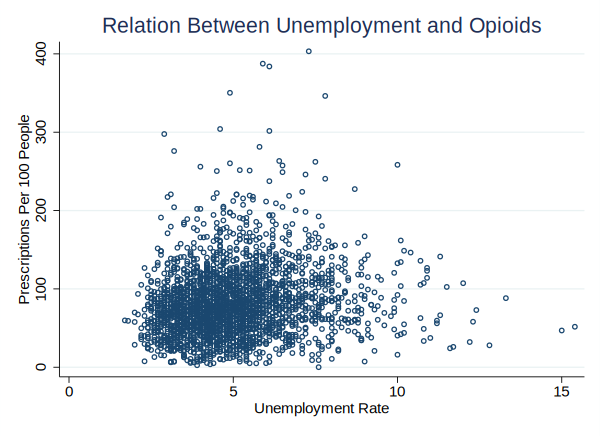

In [16]:
twoway scatter prescrip_rate urate, msymbol(circle_hollow) msize(small) ///
    title("Relation Between Unemployment and Opioids") ///
    xtitle("Unemployment Rate") ///
    ytitle("Prescriptions Per 100 People") ///
    graphregion(color(white) fcolor(white)) 

I'm not sure about you but it is difficult for me to see any relationship in this graph. It looks perhaps vaguely that increases in unemployment rates are associated with higher prescription rates, but here hard to tell given how many counties there are. What we are going to do next is to use a dimension reduction technique that will allow us to better visualize the relationship between unemployment and prescription rates.

What we are going to do this is to place counties into bins based on the unemployment rate and then compute the average prescription rate within each bin. This will also introduce a number of commands that can be very helpful with data wrangling. 

The first command we are going to use is the ``cut`` command. This will ``cut`` a numeric variable into a number of different bins. 

In [17]:
egen bin_u = cut(urate), group(10)

In [18]:
tab bin_u


      bin_u |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        261        9.55        9.55
          1 |        232        8.49       18.04
          2 |        319       11.67       29.71
          3 |        265        9.70       39.41
          4 |        240        8.78       48.19
          5 |        279       10.21       58.40
          6 |        277       10.14       68.53
          7 |        295       10.79       79.33
          8 |        274       10.03       89.35
          9 |        291       10.65      100.00
------------+-----------------------------------
      Total |      2,733      100.00


The option ``group(10)`` indicated we wanted 10 different bins. There is not a hard science in computing the number of bins, it will often depend on what variable you are looking at. Choosing 10 here is more or less arbitrary.

Now we are going to ``collapse`` the data so that we have a single observation per value of ``bin_u``. ``collapse`` can be extremely useful as it allows you to change the unit of observation of your dataset quickly. For example, imagine we want to go from counties to states, from individuals to firms, from students to schools. Collapse will allow you to quickly transform the unit of observation in your dataset. In our data, we would like an observation for each bin.

In [19]:
collapse (mean) prescrip_rate urate, by(bin_u)

In [20]:
%head

,bin_u,prescrip_rate,urate
1,0,68.59348659003832,2.784674329501916
2,1,70.88275862068967,3.351293103448272
3,2,73.89278996865207,3.818808777429465
4,3,70.92981132075475,4.203396226415093
5,4,82.70625000000004,4.502500000000001
6,5,81.48136200716843,4.847311827956991
7,6,80.91768953068592,5.24765342960289
8,7,88.80711864406781,5.710508474576269
9,8,93.96167883211683,6.480656934306568
10,9,92.04261168384876,8.413402061855663


To break down the command above ``(mean)`` indicates that STATA will compute the average value of ``prescrip_rate`` and ``urate`` within each ``bin_u`` and then collapse the data so that there is a single observation for each value of ``bin_u``. Therefore, for ``bin_u=0`` the average unemployment rate is 2.8 while the average prescriptions per 100 people is 68.7. Moving to ``bin_u=1`` the average unemployment rate is 3.4 while the average prescriptions per 100 people is 70.9. To visualize the data, we can try the scatterplot again, but with the bins.

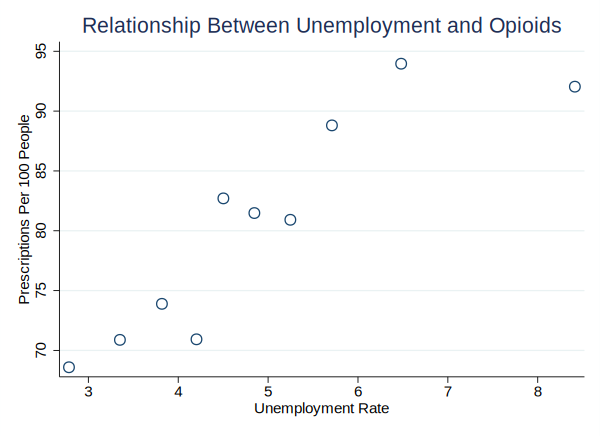

In [21]:
twoway scatter prescrip_rate urate, msymbol(circle_hollow) msize(large) ///
    title("Relationship Between Unemployment and Opioids") ///
    xtitle("Unemployment Rate") ///
    ytitle("Prescriptions Per 100 People") ///
    graphregion(color(white) fcolor(white)) 

Now it is clear that the prescription rates for opioids are higher in areas with higher unemployment, as shown in this figure. Again, it is important to stress that this relationship is by no means causal and the proper policy response likely depends on establishing causality. For example, imagine the goal of the government is to reduce opioid usage and they have two policies at their disposal. Policy one is to increase funding for prescription monitoring programs which can identify inappropriate prescription behavior by doctors. Policy two is to increase local employment subsidies increase the employment rates, which will in turn decrease opioid abuse.

Whether policy one or two is effective depends on the main driver of the epidemic (not to mention the implementation details of each). If, for the sake of argument, the high prescription rates in areas with high unemployment is due completely to physician's being more likely to prescribe opioids in these regions (for whatever reason), then the employment subsidies would likely be ineffective at reducing opioid usage. Instead, one should use the monitoring program to identify and dissuade inappropriate prescribing behavior. 